In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
data=pd.read_csv("_cancer_dataset_uae.csv")

In [13]:
data.head(5)

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [14]:
data=data.drop(["Patient_ID","Death_Date","Cause_of_Death","Comorbidities"],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Nationality           10000 non-null  object
 3   Emirate               10000 non-null  object
 4   Diagnosis_Date        10000 non-null  object
 5   Cancer_Type           10000 non-null  object
 6   Cancer_Stage          10000 non-null  object
 7   Treatment_Type        10000 non-null  object
 8   Treatment_Start_Date  10000 non-null  object
 9   Hospital              10000 non-null  object
 10  Primary_Physician     10000 non-null  object
 11  Outcome               10000 non-null  object
 12  Smoking_Status        10000 non-null  object
 13  Ethnicity             10000 non-null  object
 14  Weight                10000 non-null  int64 
 15  Height                10000 non-null 

In [16]:
data.describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


In [17]:
data.isnull().sum()

Age                     0
Gender                  0
Nationality             0
Emirate                 0
Diagnosis_Date          0
Cancer_Type             0
Cancer_Stage            0
Treatment_Type          0
Treatment_Start_Date    0
Hospital                0
Primary_Physician       0
Outcome                 0
Smoking_Status          0
Ethnicity               0
Weight                  0
Height                  0
dtype: int64

In [19]:
le=LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])

In [21]:
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [31]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes Classifier": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [33]:
results=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': pre,
        'Recall': recall,
        'F1 Score': f1
    })

In [34]:
result=pd.DataFrame(results)

In [35]:
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.4560,0.393194,0.4560,0.406864
1,Decision Tree Classifier,0.3940,0.401227,0.3940,0.397495
2,K-Nearest Neighbors,0.4330,0.407411,0.4330,0.413463
3,Logistic Regression,0.4875,0.484475,0.4875,0.321853
4,Naive Bayes Classifier,0.4840,0.382892,0.4840,0.327325
5,Gradient Boosting Classifier,0.4915,0.433398,0.4915,0.398480


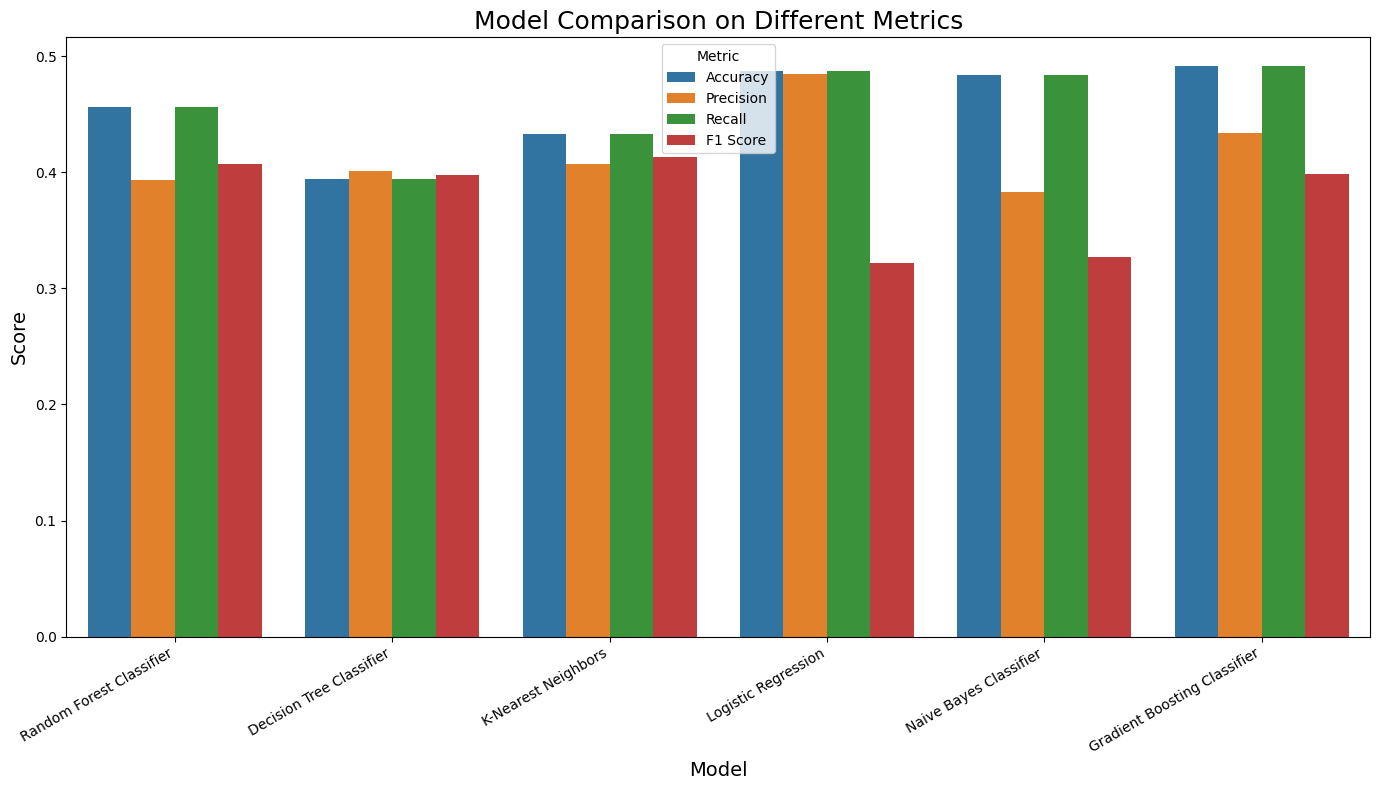

In [40]:
data_melted = pd.melt(result, id_vars=['Model'], 
                      value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                      var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=data_melted)

plt.title('Model Comparison on Different Metrics', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
